In [3]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
from multistep_lstm_company import MultiStepLSTMCompany

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')


Populating the interactive namespace from numpy and matplotlib


D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/03/2018"

one_step_lstm = OneStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_epochs=3000, n_batch=1, n_neurons=4)
one_step_lstm.train()


In [ ]:
predictions = one_step_lstm.predict()
one_step_lstm.plot(predictions)

lstm_score = one_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = one_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

print("\n")
one_day_pred = one_step_lstm.forecast_lstm_one_step()
one_step_lstm.plot(one_day_pred)

In [125]:
start_train_date = "01/01/2018"
end_train_start_test_date = "20/01/2018"
end_test_date = "30/01/2018"

multi_step_lstm = MultiStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_lag=3, n_seq=3, n_epochs=3000, n_batch=1, n_neurons=4)

multi_step_lstm.train()

'data series'

date
2018-01-02    43.67
2018-01-03    44.98
2018-01-04    46.88
2018-01-05    45.80
2018-01-08    45.55
2018-01-09    42.97
2018-01-10    43.31
2018-01-11    42.82
2018-01-12    42.81
2018-01-16    42.92
2018-01-17    44.26
2018-01-18    43.99
2018-01-19    42.75
2018-01-22    42.88
2018-01-23    43.95
2018-01-24    43.08
2018-01-25    43.01
2018-01-26    43.67
2018-01-29    43.29
2018-01-30    41.67
Name: 5. adjusted close, dtype: float64

'scaled train supervised'

array([[ 0.73660714,  1.        , -0.33035714,  0.04017857, -1.        ,
         0.30357143],
       [ 1.        , -0.33035714,  0.04017857, -1.        ,  0.30357143,
        -0.06696429],
       [-0.33035714,  0.04017857, -1.        ,  0.30357143, -0.06696429,
         0.14732143],
       [ 0.04017857, -1.        ,  0.30357143, -0.06696429,  0.14732143,
         0.20089286],
       [-1.        ,  0.30357143, -0.06696429,  0.14732143,  0.20089286,
         0.75      ],
       [ 0.30357143, -0.06696429,  0.14732143,  0.20089286,  0.75      ,
         0.03125   ],
       [-0.06696429,  0.14732143,  0.20089286,  0.75      ,  0.03125   ,
        -0.40178571]])

'scaled test supervised'

array([[ 0.75      ,  0.03125   , -0.40178571,  0.20982143,  0.62946429,
        -0.23660714],
       [ 0.03125   , -0.40178571,  0.20982143,  0.62946429, -0.23660714,
         0.12053571],
       [-0.40178571,  0.20982143,  0.62946429, -0.23660714,  0.12053571,
         0.44642857],
       [ 0.20982143,  0.62946429, -0.23660714,  0.12053571,  0.44642857,
        -0.01785714],
       [ 0.62946429, -0.23660714,  0.12053571,  0.44642857, -0.01785714,
        -0.57142857]])

Fitting the model


'train X data'

array([[[ 0.73660714,  1.        , -0.33035714]],

       [[ 1.        , -0.33035714,  0.04017857]],

       [[-0.33035714,  0.04017857, -1.        ]],

       [[ 0.04017857, -1.        ,  0.30357143]],

       [[-1.        ,  0.30357143, -0.06696429]],

       [[ 0.30357143, -0.06696429,  0.14732143]],

       [[-0.06696429,  0.14732143,  0.20089286]]])

'train y data'

array([[ 0.04017857, -1.        ,  0.30357143],
       [-1.        ,  0.30357143, -0.06696429],
       [ 0.30357143, -0.06696429,  0.14732143],
       [-0.06696429,  0.14732143,  0.20089286],
       [ 0.14732143,  0.20089286,  0.75      ],
       [ 0.20089286,  0.75      ,  0.03125   ],
       [ 0.75      ,  0.03125   , -0.40178571]])

Finished fitting the model, time taken to train: 29.8 s


X:  [ 0.75        0.03125    -0.40178571] y:  [ 0.20982143  0.62946429 -0.23660714]
Prediction:  [0.63366735, 0.77443, -0.06593834]
X:  [ 0.03125    -0.40178571  0.20982143] y:  [ 0.62946429 -0.23660714  0.12053571]
Prediction:  [0.64040124, 0.25820088, -0.03804387]
X:  [-0.40178571  0.20982143  0.62946429] y:  [-0.23660714  0.12053571  0.44642857]
Prediction:  [1.1463139, -0.8754102, -0.6830945]
X:  [ 0.20982143  0.62946429 -0.23660714] y:  [ 0.12053571  0.44642857 -0.01785714]
Prediction:  [1.5961684, -1.0773103, -0.3043568]
X:  [ 0.62946429 -0.23660714  0.12053571] y:  [ 0.44642857 -0.01785714 -0.57142857]
Prediction:  [1.2289705, -0.6966689, 0.050822683]
Inverse scale  Original Pred:  [[ 0.63366735]
 [ 0.77443   ]
 [-0.06593834]]    After Scaling:  [[ 1.0794148]
 [ 1.394723 ]
 [-0.4877019]]
Inverse difference Pred:  [1.0794148]   + Reference Price: 42.75  =  [43.829414]
Inverse difference Pred:  [1.394723]   + Reference Price: [43.829414]  =  [45.224136]
Inverse difference Pred:  [

2018-01-22    [[43.829414], [45.224136], [44.736435]]
2018-01-23       [[43.9745], [44.212868], [43.78765]]
2018-01-24     [[46.177742], [43.876823], [42.00669]]
2018-01-25     [[46.31542], [43.562244], [42.540485]]
2018-01-26    [[45.422894], [43.522354], [43.296196]]
dtype: object

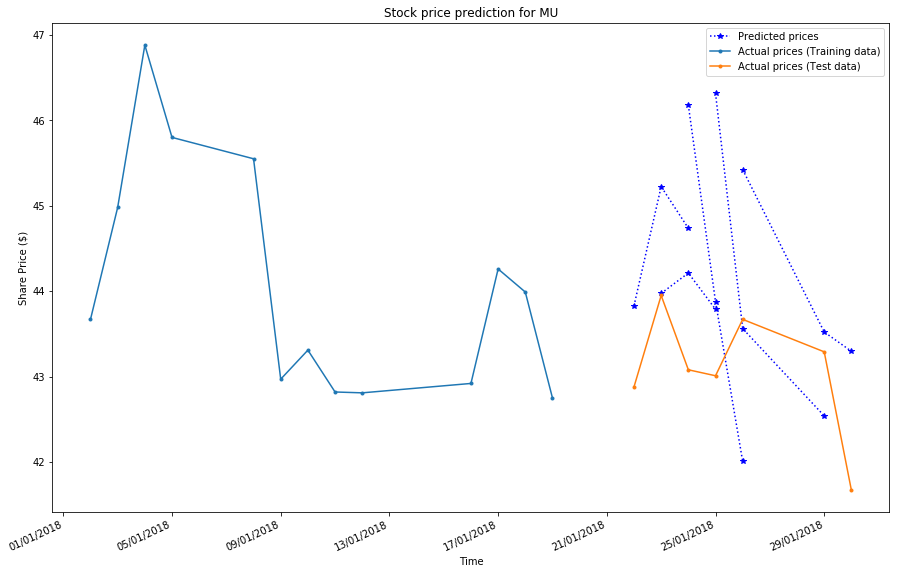

In [126]:
predictions = multi_step_lstm.predict()
multi_step_lstm.plot(predictions)
#display("next days predictions", multi_step_lstm.forecast_lstm_one_step())

In [127]:
trend_score = multi_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: ", trend_score)
lstm_score = multi_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: US dollar", lstm_score)


Calculating trend score for  1
Price 1 day before:  42.75
Actual price:  42.88  | Predicted price:  [43.829414]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.88
Actual price:  43.95  | Predicted price:  [43.9745]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  43.08  | Predicted price:  [46.177742]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.08
Actual price:  43.01  | Predicted price:  [46.31542]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.01
Actual price:  43.67  | Predicted price:  [45.422894]
Actual trend:  up  | Predicted trend:  up
Correct counts:  3   Size of test set: 7

Calculating trend score for  2
Price 1 day before:  42.88
Actual price:  43.95  | Predicted price:  [45.224136]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  43.08  | Predicted price:  [44.212868]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.08
Actu